In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Overview dataset

In [95]:
df=pd.read_csv(r"C:\Users\goex1\Desktop\DS Projekte für GITHUB\Data Science Jobs Salaries\DATA.csv")

df.head(5)

,job_title,country,city,salary,currency,years_experience,skills,tools_models,work_mode,company_size,industry,year,education,gender,job_demand_index,source
0,Machine Learning Engineer,France,Paris,148500,EUR,15,"PyTorch, TensorFlow, Kubernetes","TensorFlow, ONNX",Remote,Large,Healthcare,2020,Diploma,Male,74,Synthetic approximation based on public salary...
1,LLM Researcher,UAE,Abu Dhabi,643500,AED,15,"Distributed Training, PyTorch, Transformers","Custom LLM, Llama 3",Onsite,Large,Healthcare,2023,PhD,Non-binary,77,Synthetic approximation based on public salary...
2,Data Scientist,France,Marseille,108000,EUR,4,"Scikit-learn, NumPy, Pandas","RandomForest, LightGBM",Remote,Medium,Technology,2022,Bachelors,Non-binary,80,Synthetic approximation based on public salary...
3,Data Scientist,France,Lyon,60000,EUR,2,"SQL, Statistics, Python","RandomForest, LightGBM",Hybrid,Medium,Education,2023,Masters,Female,79,Synthetic approximation based on public salary...
4,Machine Learning Engineer,Canada,Ottawa,105600,CAD,6,"TensorFlow, MLflow, Docker","TensorFlow, PyTorch",Hybrid,Large,Consulting,2024,Masters,Male,92,Synthetic approximation based on public salary...


## descriptive statistics of metric features

In [233]:
print("salary")

df['salary'].describe()

salary


count    5.000000e+02
mean     4.116432e+05
std      6.484226e+05
min      5.500000e+04
25%      1.223750e+05
50%      1.610000e+05
75%      2.709250e+05
max      3.408600e+06
Name: salary, dtype: float64

In [232]:
print("years_experience")
df['years_experience'].describe()

years_experience


count    500.000000
mean       8.108000
std        4.586765
min        0.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       15.000000
Name: years_experience, dtype: float64

## Filtering Salaries with EUR currency and preprocessing with onehotencoder and ordinalencoder

In [96]:

#Filter only countries with EUR

df_EUR=df[df['currency']=="EUR"]

In [97]:
#Countries involved in Analysis

df_EUR['country'].unique()

array(['France', 'Germany', 'Netherlands'], dtype=object)

## Preprocessing with onehotencoder


In [98]:

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_transform= ohe.fit_transform(df_EUR[['country','work_mode', 'industry', 'gender', 'job_title']])

In [99]:
ohe_transform

,country_France,country_Germany,country_Netherlands,work_mode_Hybrid,work_mode_Onsite,work_mode_Remote,industry_Consulting,industry_E-commerce,industry_Education,industry_Finance,...,industry_Technology,gender_Female,gender_Male,gender_Non-binary,gender_Prefer not to say,job_title_Data Scientist,job_title_Generative AI Engineer,job_title_LLM Researcher,job_title_Machine Learning Engineer,job_title_Prompt Engineer
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
486,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
488,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
491,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [100]:
df_new= pd.concat([df_EUR,ohe_transform], axis=1)

In [101]:
df_new.head(4)

,job_title,country,city,salary,currency,years_experience,skills,tools_models,work_mode,company_size,...,industry_Technology,gender_Female,gender_Male,gender_Non-binary,gender_Prefer not to say,job_title_Data Scientist,job_title_Generative AI Engineer,job_title_LLM Researcher,job_title_Machine Learning Engineer,job_title_Prompt Engineer
0,Machine Learning Engineer,France,Paris,148500,EUR,15,"PyTorch, TensorFlow, Kubernetes","TensorFlow, ONNX",Remote,Large,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Data Scientist,France,Marseille,108000,EUR,4,"Scikit-learn, NumPy, Pandas","RandomForest, LightGBM",Remote,Medium,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Data Scientist,France,Lyon,60000,EUR,2,"SQL, Statistics, Python","RandomForest, LightGBM",Hybrid,Medium,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Machine Learning Engineer,France,Marseille,126500,EUR,5,"Python, Docker, PyTorch","ONNX, PyTorch",Remote,Large,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [102]:
df_new['company_size'].unique()


array(['Large', 'Medium', 'Startup'], dtype=object)

## Preprocessing with Ordinalencoder

In [103]:
sizes=['Startup','Medium','Large']

from sklearn.preprocessing import OrdinalEncoder

ordencoder=OrdinalEncoder(categories=[sizes])

In [104]:
df_new['company_size_transform'] = ordencoder.fit_transform(df_new[['company_size']])

In [114]:
df_new.columns

Index(['job_title', 'country', 'city', 'salary', 'currency',
       'years_experience', 'skills', 'tools_models', 'work_mode',
       'company_size', 'industry', 'year', 'education', 'gender',
       'job_demand_index', 'source', 'country_France', 'country_Germany',
       'country_Netherlands', 'work_mode_Hybrid', 'work_mode_Onsite',
       'work_mode_Remote', 'industry_Consulting', 'industry_E-commerce',
       'industry_Education', 'industry_Finance', 'industry_Healthcare',
       'industry_Technology', 'gender_Female', 'gender_Male',
       'gender_Non-binary', 'gender_Prefer not to say',
       'job_title_Data Scientist', 'job_title_Generative AI Engineer',
       'job_title_LLM Researcher', 'job_title_Machine Learning Engineer',
       'job_title_Prompt Engineer', 'company_size_transform'],
      dtype='object')

## Visualizing descriptive statistics

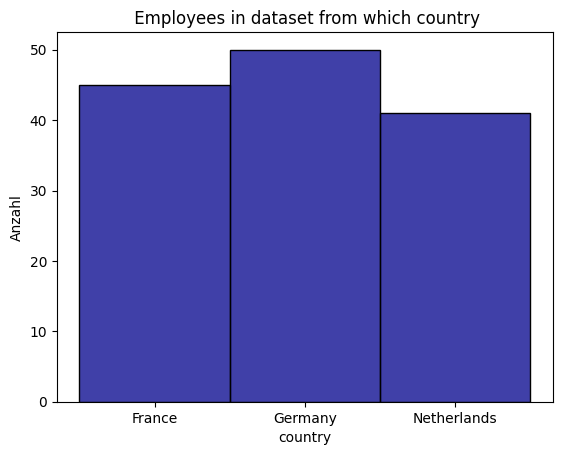

In [173]:
sns.histplot(data=df_new,x='country', color='darkblue')
plt.title(' Employees in dataset from which country')
plt.ylabel('Anzahl')
plt.show()

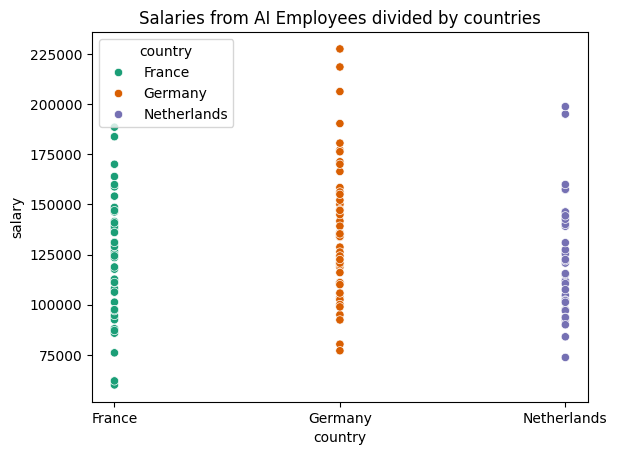

In [235]:
sns.scatterplot(data=df_new,y='salary', x='country', hue='country', palette='Dark2')
plt.title ('Salaries from AI Employees divided by countries')
plt.show()

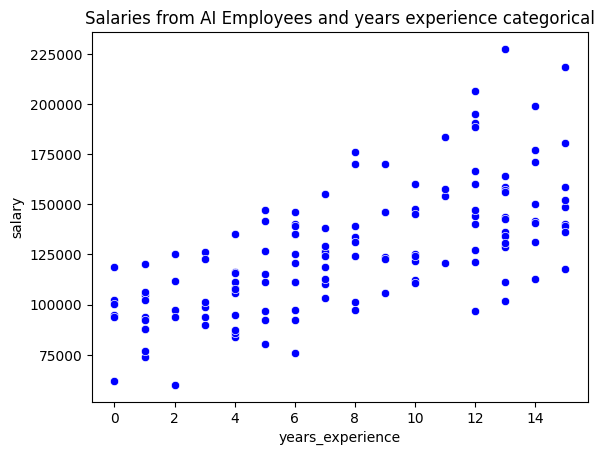

In [237]:
sns.scatterplot(data=df_new,y='salary', x='years_experience', color='blue')
plt.title ('Salaries from AI Employees and years experience categorical')
plt.show()

In [216]:
bins = [0,5,10,20]  # 0-1, 1-5, 5-10, 10-15
labels = ["0-5", "5-10", "10-20"]

df_new['years_experience_category']=pd.cut(x=df_new['years_experience'],bins=bins,labels=labels, right=False)

[df_new['years_experience_category'].unique()]

[['10-20', '0-5', '5-10']
 Categories (3, object): ['0-5' < '5-10' < '10-20']]

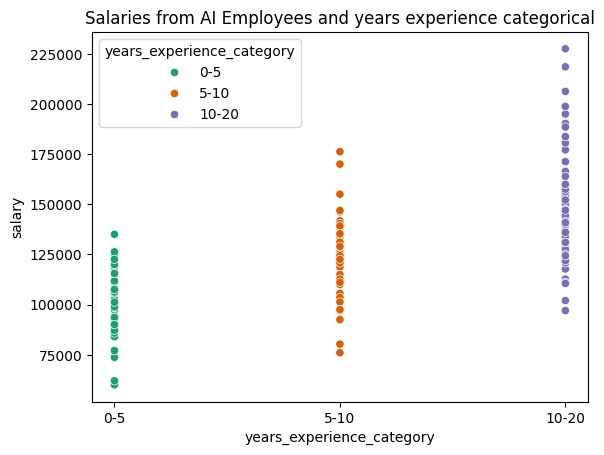

In [234]:
sns.scatterplot(data=df_new,y='salary', x='years_experience_category', hue='years_experience_category', palette='Dark2')
plt.title ('Salaries from AI Employees and years experience categorical')
plt.show()

In [206]:
[df_new['years_experience_category'].unique()]

[['5-20', '0-5']
 Categories (2, object): ['0-5' < '5-20']]

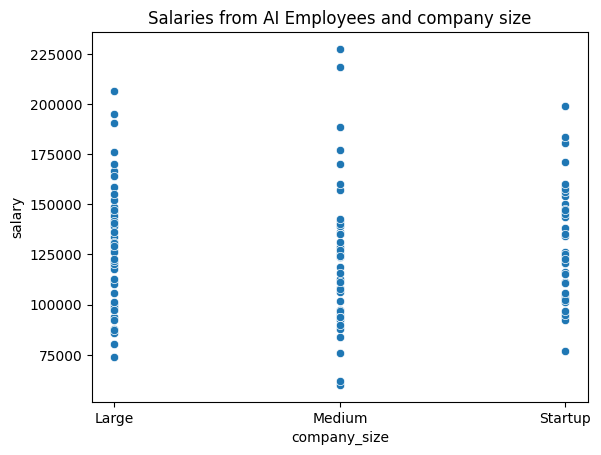

In [241]:
sns.scatterplot(data=df_new,y='salary', x='company_size')
plt.title ('Salaries from AI Employees and company size')
plt.show()

## Lineare Regression und Datensatzsplit

In [238]:
#Split data test and train

from sklearn.model_selection import train_test_split

X=df_new[['years_experience', 'country_France', 'country_Germany','country_Netherlands','company_size_transform','work_mode_Hybrid', 'work_mode_Onsite','work_mode_Remote']]

y=df_new['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [138]:
y_pred=reg.predict(X_test)

## Grafische Darstellung - predicted vs true values

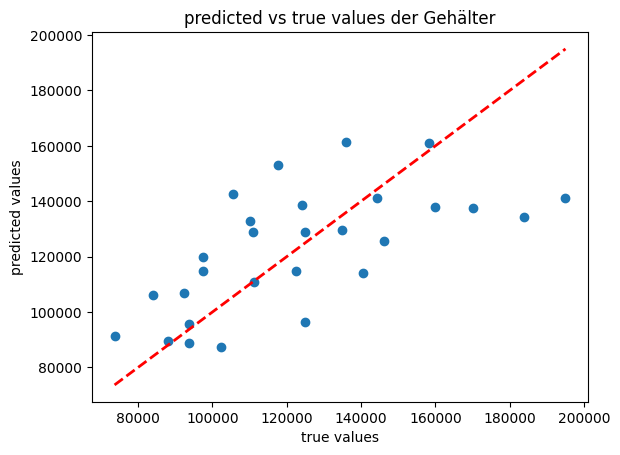

In [151]:
plt.scatter(y_test,y_pred)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("predicted vs true values der Gehälter")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.show()

## Koeffizienten des Modells

In [169]:
print(f"Intercept: {reg.intercept_:.2f}")

for name, coef in zip(X.columns, reg.coef_):
    print(f"{name}: {coef:.2f}")


Intercept: 91092.52
years_experience: 4532.65
country_France: -6864.05
country_Germany: 10622.05
country_Netherlands: -3757.99
company_size_transform: 82.64
work_mode_Hybrid: 75.26
work_mode_Onsite: -669.43
work_mode_Remote: 594.17


## Modellgüte

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print ("r²=", r2)
print ("mae=", mae)


r²= 0.4020983663166121
mae= 18810.26173999743
